<a href="https://colab.research.google.com/github/vidyaana22/portofolio-dataanalyst/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 15
1. Vidyana Yulianingrum (162112133002)
2. Juan Alberto Galih Leo (162112133027)
3. Ilhan Rafif Nagata (162112133100)
4. Bunga Citra S. L. (162112133107)

Link Dataset : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

#**Data Wrangling**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel('train2.xlsx')
df

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7.0,19,0,0,1,1
1,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3.0,7,1,1,0,2
2,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2.0,9,1,1,0,2
3,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8.0,11,1,0,0,2
4,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4.0,19,1,1,0,0
1996,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,1.0,16,1,1,1,2
1997,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1.0,5,1,1,0,3
1998,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,1.0,19,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          2000 non-null   int64  
 1   clock_speed   2000 non-null   float64
 2   dual_sim      2000 non-null   int64  
 3   fc            2000 non-null   int64  
 4   four_g        2000 non-null   int64  
 5   int_memory    2000 non-null   int64  
 6   m_dep         2000 non-null   float64
 7   mobile_wt     2000 non-null   int64  
 8   n_cores       2000 non-null   int64  
 9   pc            2000 non-null   int64  
 10  px_height     2000 non-null   int64  
 11  px_width      2000 non-null   int64  
 12  ram           2000 non-null   int64  
 13  sc_h          2000 non-null   int64  
 14  sc_w          1820 non-null   float64
 15  talk_time     2000 non-null   int64  
 16  three_g       2000 non-null   int64  
 17  touch_screen  2000 non-null   int64  
 18  wifi          2000 non-null 

# **Identifikasi Data Duplikat**

In [ ]:
pd.DataFrame(data = [df.duplicated().sum()],
             index=["Train df duplicates"]).T.style.background_gradient(cmap='YlOrRd')

,Train df duplicates
0,0


# **Identifikasi Missing Value**

In [ ]:
# Mengecek apakah ada missing value dalam setiap kolom
print(df.isnull().any())

# Menghitung jumlah missing value dalam setiap kolom
print(df.isnull().sum())


blue            False
clock_speed     False
dual_sim        False
fc              False
four_g          False
int_memory      False
m_dep           False
mobile_wt       False
n_cores         False
pc              False
px_height       False
px_width        False
ram             False
sc_h            False
sc_w             True
talk_time       False
three_g         False
touch_screen    False
wifi            False
price_range     False
dtype: bool
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w            180
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64


In [ ]:
# drop rows where at least on value is missing
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          1820 non-null   int64  
 1   clock_speed   1820 non-null   float64
 2   dual_sim      1820 non-null   int64  
 3   fc            1820 non-null   int64  
 4   four_g        1820 non-null   int64  
 5   int_memory    1820 non-null   int64  
 6   m_dep         1820 non-null   float64
 7   mobile_wt     1820 non-null   int64  
 8   n_cores       1820 non-null   int64  
 9   pc            1820 non-null   int64  
 10  px_height     1820 non-null   int64  
 11  px_width      1820 non-null   int64  
 12  ram           1820 non-null   int64  
 13  sc_h          1820 non-null   int64  
 14  sc_w          1820 non-null   float64
 15  talk_time     1820 non-null   int64  
 16  three_g       1820 non-null   int64  
 17  touch_screen  1820 non-null   int64  
 18  wifi          1820 non-null 

# **Identifikasi Outlier**

In [ ]:
def num_plot(data, feature, target):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    #plot histogram and box plot for the numerical variables
    sns.histplot(data=data, x=feature, hue=target, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=feature, ax=ax[1])
    ax[0].set_title(f"{feature} Distribution Histogram")
    ax[1].set_title(f"{feature} Distribution Boxplot")

    plt.show()

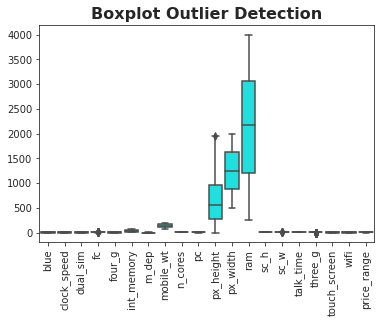

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# menetapkan style plotting seaborn
sns.set_style("ticks")

# membuat boxplot
sns.boxplot(data=df, color="cyan")

# menambahkan judul
plt.title("Boxplot Outlier Detection", fontsize=16, fontweight='bold')

# memperbaiki penamaan x-axis agar vertikal
plt.xticks(rotation=90)

# menampilkan plot
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

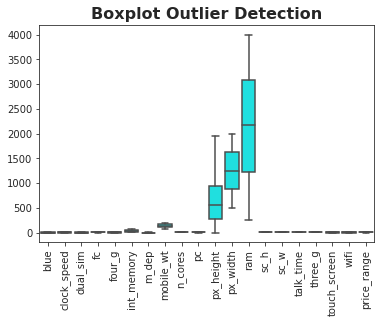

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# menetapkan style plotting seaborn
sns.set_style("ticks")

# membuat boxplot
sns.boxplot(data=df_normalized, color="cyan")

# menambahkan judul
plt.title("Boxplot Outlier Detection", fontsize=16, fontweight='bold')

# memperbaiki penamaan x-axis agar vertikal
plt.xticks(rotation=90)

# menampilkan plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1 to 1999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          1362 non-null   int64  
 1   clock_speed   1362 non-null   float64
 2   dual_sim      1362 non-null   int64  
 3   fc            1362 non-null   int64  
 4   four_g        1362 non-null   int64  
 5   int_memory    1362 non-null   int64  
 6   m_dep         1362 non-null   float64
 7   mobile_wt     1362 non-null   int64  
 8   n_cores       1362 non-null   int64  
 9   pc            1362 non-null   int64  
 10  px_height     1362 non-null   int64  
 11  px_width      1362 non-null   int64  
 12  ram           1362 non-null   int64  
 13  sc_h          1362 non-null   int64  
 14  sc_w          1362 non-null   float64
 15  talk_time     1362 non-null   int64  
 16  three_g       1362 non-null   int64  
 17  touch_screen  1362 non-null   int64  
 18  wifi          1362 non-null 

# **Transformasi Data**

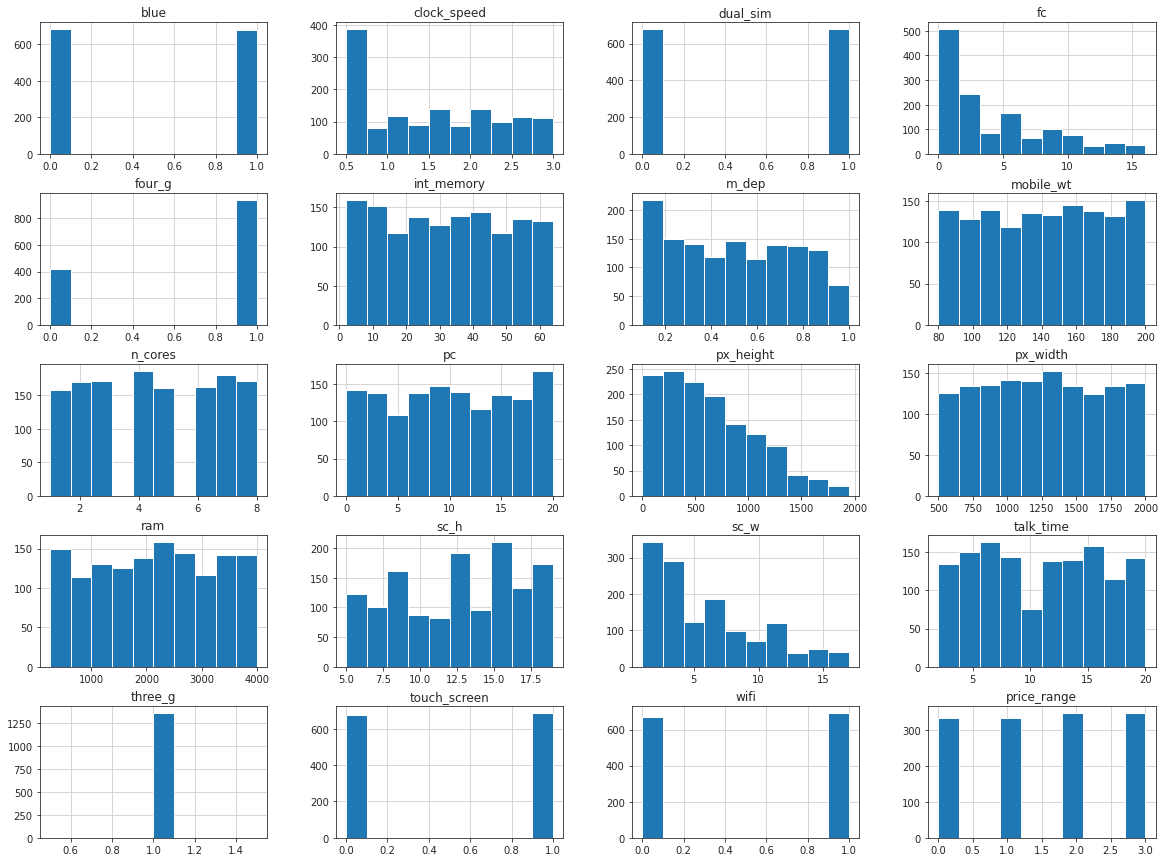

In [ ]:
# Create a histogram plot for all the dataset variables
df.hist(figsize=(20,15));

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
df_normalized = scaler.fit_transform(df)

# convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

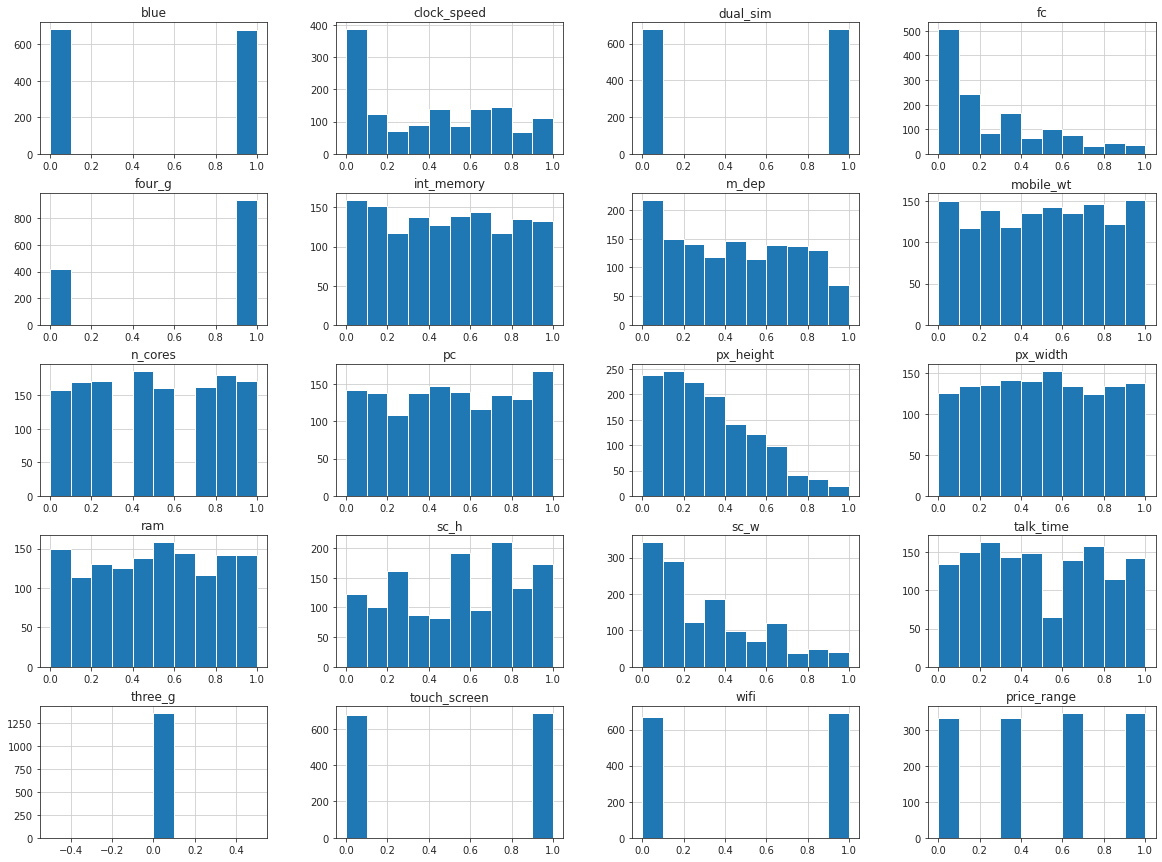

In [ ]:
# Create a histogram plot for all the dataset variables
df_normalized.hist(figsize=(20,15));

In [ ]:
df_normalized.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.464341,0.993324,0.634687,0.857143,0.1250,0.277778,0.0,1.0,0.0,0.666667
1,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.648025,0.811749,0.627205,0.428571,0.0625,0.388889,0.0,1.0,0.0,0.666667
2,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.623910,0.858478,0.671566,0.785714,0.4375,0.500000,0.0,0.0,0.0,0.666667
3,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.619805,0.475300,0.308658,0.214286,0.0625,0.722222,0.0,1.0,0.0,0.333333
4,0.0,0.00,1.0,0.1875,0.0,0.322581,0.666667,0.700000,0.000000,0.35,0.515136,0.770360,0.216729,0.857143,0.0000,0.444444,0.0,0.0,0.0,0.333333


# **Reduksi Data**

Text(0.5, 1.0, 'Train data heat map plot')

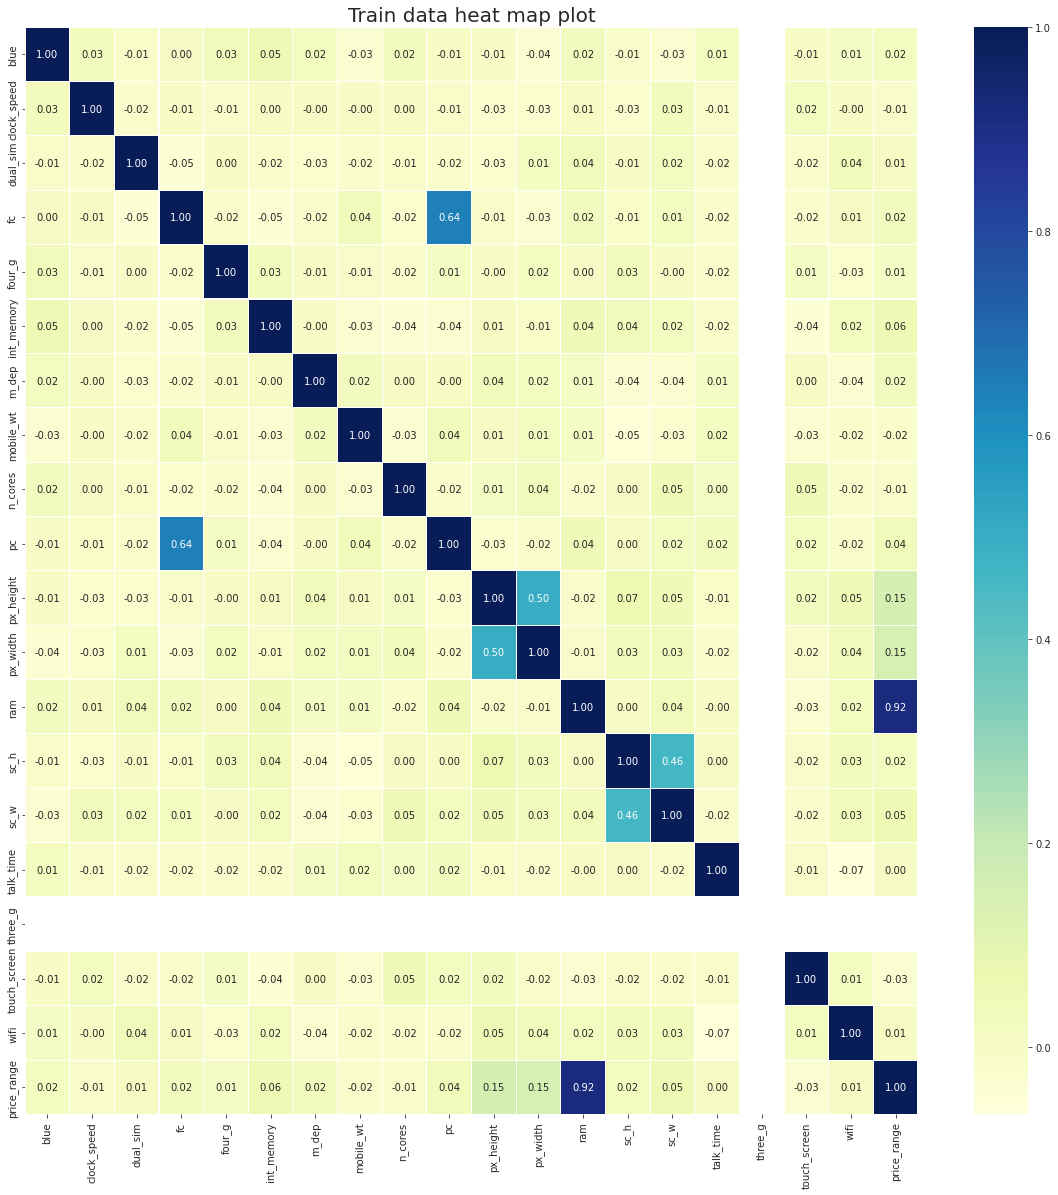

In [ ]:
# Heatmap plot for train dataset
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_normalized.corr(), cmap='YlGnBu', annot=True, linewidths=.1, fmt= '.2f', ax=ax)
plt.title('Train data heat map plot', fontsize=20)

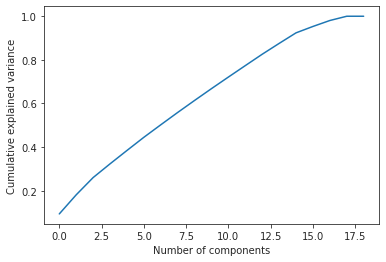

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features from target
X = df_normalized.drop('price_range', axis=1).values
y = df_normalized['price_range'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Plot scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Diketahui bahwa jumlah k terbaik adalah sekitar 2-3 features. Hal ini dikarenakan terjadi sedikit perubahan arah di titik 2,5 pada plot walau tidak terlihat dengan jelas

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Pisahkan fitur dan target
X = df_normalized.drop('price_range', axis=1)
y = df_normalized['price_range']

# Pilih fitur terbaik dengan SelectKBest dan mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=3)
selector.fit(X, y)

# Cetak nama fitur terbaik
print("Fitur terbaik:", X.columns[selector.get_support()])

# Cetak nama variabel target
print("Variabel target:", 'price_range')


Fitur terbaik: Index(['blue', 'px_width', 'ram'], dtype='object')
Variabel target: price_range


In [ ]:
df_baru = df_normalized[['fc', 'px_width', 'ram','price_range']]

Text(0.5, 1.0, 'Train data heat map plot')

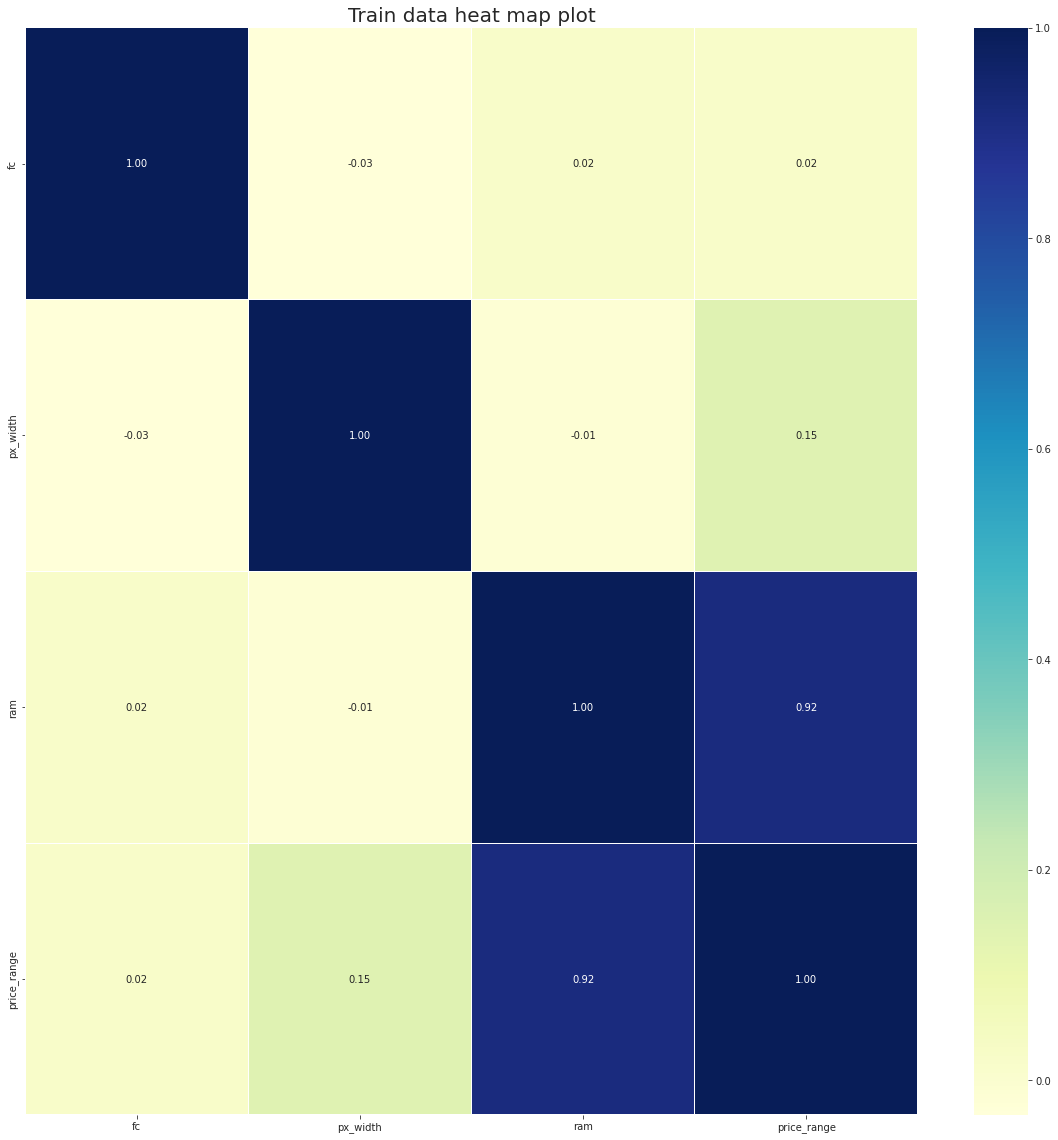

In [ ]:
# Heatmap plot for train dataset
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_baru.corr(), cmap='YlGnBu', annot=True, linewidths=.1, fmt= '.2f', ax=ax)
plt.title('Train data heat map plot', fontsize=20)

# **Imbalance Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_count = df_baru['price_range'].value_counts()

# Plot the distribution of classes
plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

NameError: ignored

Karena plot yang telah diberikan menunjukkan data yang sudah seimbang (balance) kita tidak perlu untuk melakukan handling imbalance data